# ANN

In [2]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,SLP,H,W,V,VM,PM 2.5
0,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
# Splitting into independent and dependent

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
y.isnull().sum()

2

In [6]:
## Replacing the null values with median
y.fillna(y.median(),inplace=True)

In [7]:
### Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [8]:
### Implementation

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [15]:
model=Sequential()

In [23]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               1024      
                                                                 
 dense_27 (Dense)            (None, 256)               33024     
                                                                 
 dense_28 (Dense)            (None, 256)               65792     
                                                                 
 dense_29 (Dense)            (None, 256)               65792     
                                                                 
 dense_30 (Dense)            (None, 1)                 257       
                                                                 
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [=============================

52/52 [==============================] - 0s 7ms/step - loss: 40.8003 - mean_absolute_error: 40.8003 - val_loss: 42.3977 - val_mean_absolute_error: 42.3977
Epoch 44/100
52/52 [==============================] - 0s 4ms/step - loss: 40.0193 - mean_absolute_error: 40.0193 - val_loss: 44.8325 - val_mean_absolute_error: 44.8325
Epoch 45/100
52/52 [==============================] - 0s 6ms/step - loss: 41.3316 - mean_absolute_error: 41.3316 - val_loss: 41.9960 - val_mean_absolute_error: 41.9960
Epoch 46/100
52/52 [==============================] - 0s 7ms/step - loss: 40.8556 - mean_absolute_error: 40.8556 - val_loss: 42.4214 - val_mean_absolute_error: 42.4214
Epoch 47/100
52/52 [==============================] - 0s 8ms/step - loss: 40.5618 - mean_absolute_error: 40.5618 - val_loss: 43.5478 - val_mean_absolute_error: 43.5478
Epoch 48/100
52/52 [==============================] - 0s 8ms/step - loss: 39.2013 - mean_absolute_error: 39.2013 - val_loss: 42.9010 - val_mean_absolute_error: 42.9010
Epoch

Epoch 92/100
52/52 [==============================] - 0s 5ms/step - loss: 40.2686 - mean_absolute_error: 40.2686 - val_loss: 42.8390 - val_mean_absolute_error: 42.8390
Epoch 93/100
52/52 [==============================] - 0s 7ms/step - loss: 39.4816 - mean_absolute_error: 39.4816 - val_loss: 45.3541 - val_mean_absolute_error: 45.3541
Epoch 94/100
52/52 [==============================] - 1s 10ms/step - loss: 38.5845 - mean_absolute_error: 38.5845 - val_loss: 41.7348 - val_mean_absolute_error: 41.7348
Epoch 95/100
52/52 [==============================] - 1s 10ms/step - loss: 39.8525 - mean_absolute_error: 39.8525 - val_loss: 46.5759 - val_mean_absolute_error: 46.5759
Epoch 96/100
52/52 [==============================] - 1s 13ms/step - loss: 37.8916 - mean_absolute_error: 37.8916 - val_loss: 45.9972 - val_mean_absolute_error: 45.9972
Epoch 97/100
52/52 [==============================] - 0s 6ms/step - loss: 39.6680 - mean_absolute_error: 39.6680 - val_loss: 43.0772 - val_mean_absolute_erro

In [24]:
prediction=NN_model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

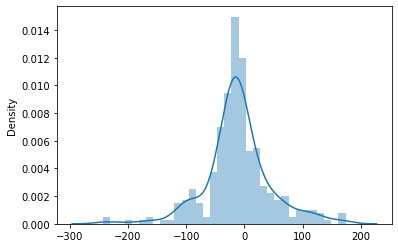

In [27]:
# dist plot
sns.distplot(y_test.values.reshape(-1,1)-prediction)

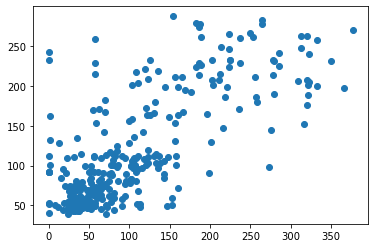

In [28]:
# scatter
plt.scatter(y_test,prediction)

In [29]:
### Evaluation metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score

print('MAE: {}'.format(mean_absolute_error(y_test,prediction)))
print('MSE: {}'.format(mean_squared_error(y_test,prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,prediction))))
print('r2 score: {}'.format(r2_score(y_test,prediction)))

MAE: 40.36857966307349
MSE: 3303.7303549570875
RMSE: 57.47808586719888
r2 score: 0.5386735875077225
